In [19]:
import MoRIC_common_func as cf

directory = cf.format_path(r'C:\Users\Darren Wu\Desktop\SpaceInfos\2023\TW1Cont\MoRIC\Batch')
cf.enter_dir(directory)
p = cf.load_data_list('*.2CL')

File list loaded.


In [ ]:
# Find coordinates at the centre of every frame and reorganize into a single dataframe, saving as pickle file
df_centre = cf.pd.DataFrame(columns=['Longitude', 'Latitude'])
for path in p:
    coor = cf.read_pds(path)[1]
    #print(coor)
    coor_centre = coor.iloc[[int(1088/2)]]
    df_centre.loc[path] = [coor_centre['Longitude'].values[0], coor_centre['Latitude'].values[0]]
    print('Added ' + path + ' centre coordinates to list')

In [27]:
# Test reading pickle stream
df = cf.pd.read_pickle('coor_centre')
print(df)

                                                    Longitude  Latitude
HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211116164610_2...   -86.6876   36.2109
HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211117140001_2...   -37.1990   35.6471
HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211118111400_2...    12.2542   35.2276
HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211119082752_2...    61.7111   34.6441
HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211120054152_2...   111.1599   34.1264
...                                                       ...       ...
HX1-Or_GRAS_MoRIC-F-0047_SCI_N_20211126104507_2...   -96.1398   54.2686
HX1-Or_GRAS_MoRIC-F-0047_SCI_N_20211127075905_2...   -46.7342   54.8271
HX1-Or_GRAS_MoRIC-F-0047_SCI_N_20211128051258_2...     2.6626   55.3517
HX1-Or_GRAS_MoRIC-F-0047_SCI_N_20211129234056_2...   101.4534   56.4083
HX1-Or_GRAS_MoRIC-F-0047_SCI_N_20211130205451_2...   150.8125   56.9640

[720 rows x 2 columns]


Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211116164610_20211116164610_00584_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211117140001_20211117140001_00587_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211118111400_20211118111400_00590_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211119082752_20211119082752_00593_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211120054152_20211120054152_00596_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211121025549_20211121025549_00599_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211122000938_20211122000938_00602_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211122212340_20211122212340_00605_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211123183735_20211123183735_00608_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211124155132_20211124155132_00611_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211126101925_20211126101925_00617_A.2CL
Plotting HX1-Or_GRAS_MoRIC-F-0000_SCI_N_20211127073323_20211127073323_00620_A.2CL
Plotting HX1-Or_

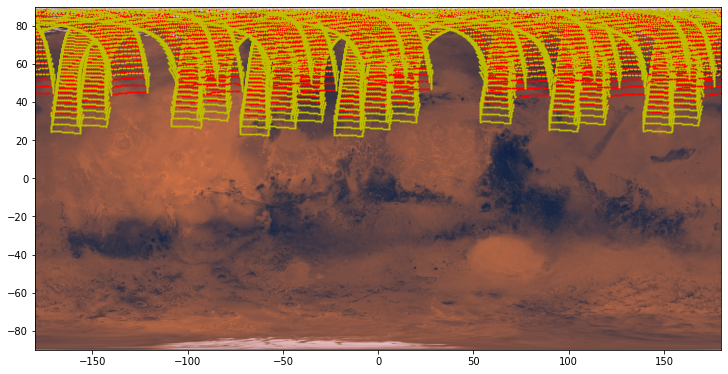

In [11]:
# Test plotting all image boundaries
layout = [['Map']]
gs_kw = dict(width_ratios=[1], height_ratios=[1])
path_map = cf.format_path(r'C:\Users\Darren Wu\Desktop\SpaceInfos\2023\TW1Cont\MoRIC\Batch\Mars_Viking_ClrMosaic_global_925m-2.jpg')

fig_map, axes = cf.create_plot_layout(layout, gs_kw, figsize=(10, 10))
cf.plot_base_map(axes['Map'], path_map)
for path in p:
    coor = cf.read_pds(path)[1]
    #print(coor)
    upper, other = cf.prune_coor(coor)
    print('Plotting ' + path)
    cf.plot_coor(axes['Map'], upper, other)

cf.plt.show()
#cf.plt.close()